In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('delivery_time.csv')

In [3]:
data.shape

(21, 2)

In [4]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<Axes: >

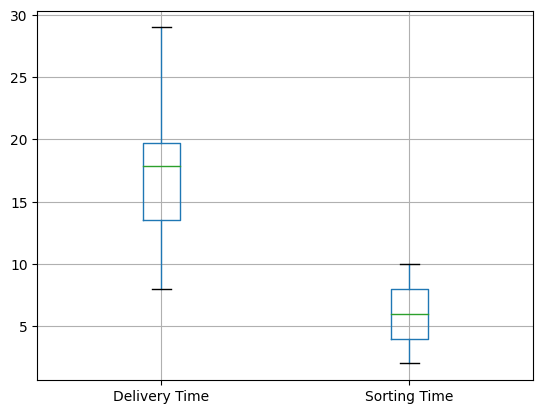

In [6]:
data.boxplot()#No outliers

In [7]:
data[data.duplicated()]#No duplicates

,Delivery Time,Sorting Time


In [8]:
data.isna().sum()#No missing values

Delivery Time    0
Sorting Time     0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Count'>

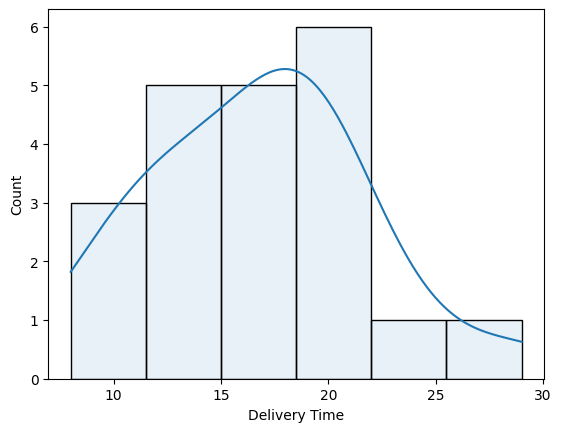

In [10]:
sns.histplot(data['Delivery Time'],kde=True,alpha=0.1)

In [11]:
data['Delivery Time'].skew()# for practical reasons we can consider this as close to normal distribution


0.3523900822831107

<Axes: xlabel='Sorting Time', ylabel='Count'>

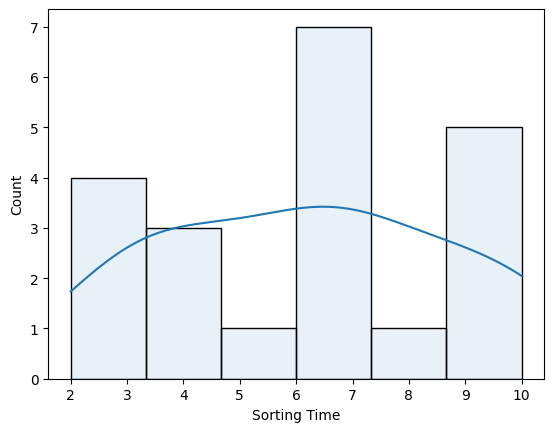

In [12]:
sns.histplot(data['Sorting Time'],kde=True,alpha=0.1)

In [13]:
data['Sorting Time'].skew() # for practical reasons we can consider this as close to normal distribution

0.047115474210530174

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y=data['Delivery Time'].values.reshape(-1,1)#Target
X=data["Sorting Time"].values.reshape(-1,1)#Feature

In [17]:
y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
model=LinearRegression()

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_pred=model.predict(X)

In [22]:
y_test

array([[21.  ],
       [18.11],
       [14.88],
       [13.5 ],
       [17.9 ]])

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
mean_absolute_error(y_true=y,y_pred=y_pred)

2.3064638757822182

In [25]:
mean_squared_error(y,y_pred)#increase with the outliers

8.838190117339568

In [26]:
r2_score(y_true=y,y_pred=y_pred)

0.6396724173614026

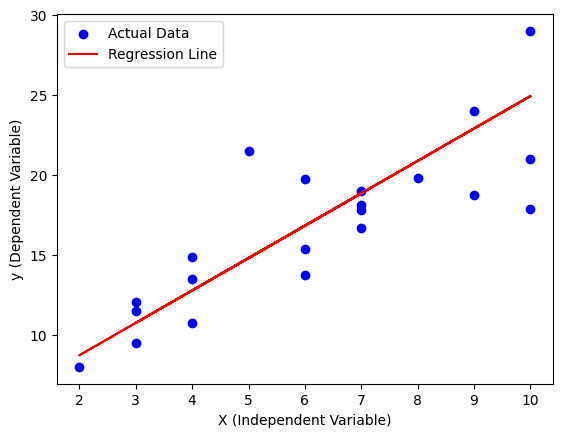

In [27]:
plt.scatter(X, y, color='b', label='Actual Data')
plt.plot(X, y_pred, color='r', label='Regression Line')
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.show()

In [28]:
#Poor r2 score, lets try to increase the r2 score by transforming the values, as the skewness is very low i dont thing
#log transformation or square transformation will be necessary, lets just go with Power transformation

In [29]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
X_train_yj=pt.fit_transform(X_train)
X_test_yj=pt.transform(X_test)
y_train_yj=pt.fit_transform(y_train)
y_test_yj=pt.transform(y_test)

In [30]:
lr=LinearRegression()

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(estimator=lr,X=X_train_yj,y=y_train_yj))

0.4242577333409308

In [31]:
lr2=LinearRegression()
lr2.fit(X,y)
lr2.score(X,y)
#As the data is too small we cant take the risk of splitting the data for validation

0.6822714748417231

In [32]:
lr2.coef_,lr2.intercept_

(array([[1.6490199]]), array([6.58273397]))

## Using Power Transformation on the whole data

In [33]:

from sklearn.preprocessing import PowerTransformer
pt2=PowerTransformer()
X_scale=pt2.fit_transform(X)
y_scale=pt2.transform(y)

## Implementing Batch Gradient Descent

In [34]:
#Lets Try Gradient Descent and check if the results match that of OLS given by Sklearn
#initialize parameters m,b
#initialize epochs and learning rate
#Loss function=MSE so (y-yhat)^2/N or-> (y-(mx+b))^2/N
#we need to find dl/dm and dl/db for the slope of both the parameters and update the values of parameters with respect to
#the epochs such that the gradient comes closer to 0 i.e m=m-learning_rate*J(theta) Jtheta is the function of loss

#For score lets implement R2 score which is LR.score()
#R2 score=1-SSR/SST
#SSR=(y-yhat)^2/N
class GDRegressor:

    def __init__(self,epochs,learning_rate):
        self.epochs=epochs
        self.lr=learning_rate
        self.m=np.random.randint(-100,100)
        self.b=np.random.randint(-100,100)
        global epoch
        epoch=self.epochs

    def fit(self,X,y):

        for i in range(self.epochs):

            loss_slope_m = -2 * np.sum(X * (y - (self.m * X + self.b)))#dL/dm
            loss_slope_b = -2 * np.sum(y - (self.m * X + self.b))#dL/db

            self.m=self.m-(self.lr*loss_slope_m)
            self.b=self.b-(self.lr*loss_slope_b)



            #Appending all the values to plot inside a list
            y_pred_list.append(self.predict(X))
            m_list.append(self.m)
            b_list.append(self.b)
            cost_list.append(self.cost(X,y))



        self.coef_=self.m
        self.intercept_=self.b



    def score(self,X,y):
        yhat=(self.m*X)+self.b
        SSR=np.sum((y-yhat)**2)
        SST=np.sum((y-np.mean(y))**2)
        return (1-(SSR/SST))

    def predict(self,X):
        return (self.m*X)+self.b

    def cost(self,X,y):
        pred=self.predict(X)
        error=y-pred
        return np.mean(error**2)#MSE










In [35]:
y_pred_list=[]
m_list=[]
b_list=[]
cost_list=[]

In [36]:
gd=GDRegressor(epochs=15,learning_rate=0.01)
gd.fit(X_scale,y_scale)

In [37]:
epoch

15

In [38]:
gd.coef_,gd.intercept_

(1.2545629950016544, 3.605280996758782)

In [39]:
gd.score(X_scale,y_scale)

0.7084322141234733

In [40]:
lr3=LinearRegression()
lr3.fit(X_scale,y_scale)
lr3.coef_,lr3.intercept_

(array([[1.25039238]]), array([3.57999648]))

In [41]:
lr3.score(X_scale,y_scale)

0.7087298981631149

In [42]:
#Close enough so this confirms how gradient descent works and how OLS works, they provide the same result but both of them
#Have different concepts

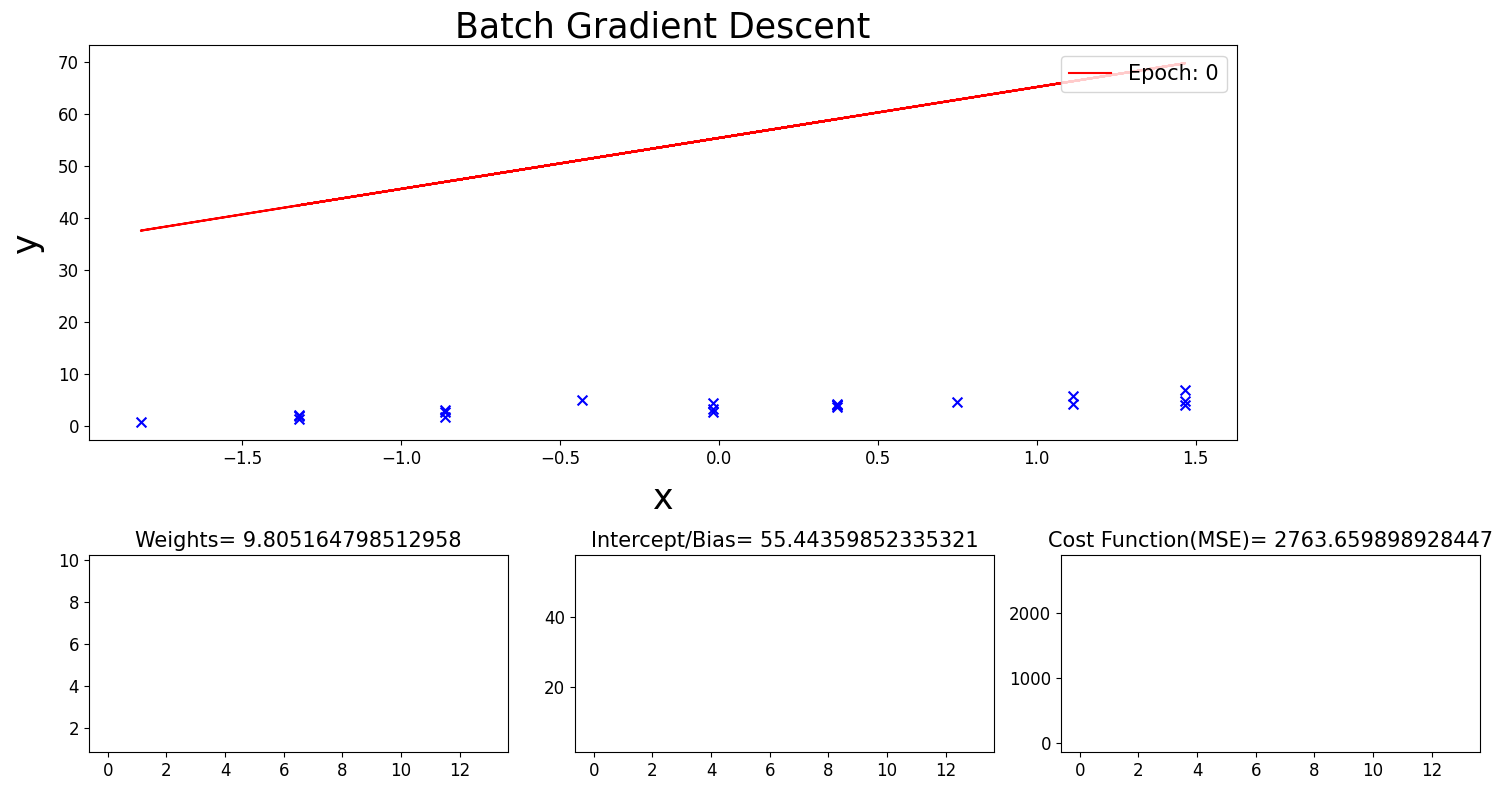

In [43]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.gridspec as gridspec

# Assuming X_scale, y_pred_list, m_list, b_list, and cost_list are available
# Define other necessary variables and functions

label_size = 12
fig = plt.figure(figsize=(15,8))

# Define the grid layout using gridspec
gs = gridspec.GridSpec(2, 6, width_ratios=[1,1,1,1,1,1], height_ratios=[2,1])

# Create subplots using the defined layout
ax1 = plt.subplot(gs[0,:5])
ax2 = plt.subplot(gs[1,:2])
ax3 = plt.subplot(gs[1,2:4])
ax4 = plt.subplot(gs[1,4:6])


def update(epoch):
    # Plot X_scale and y_pred for the current epoch in ax1
    ax1.clear()  # Clear the previous frame
    ax1.plot(X_scale, y_pred_list[epoch], color='red', label=f'Epoch: {epoch}')
    ax1.scatter(X_scale, y_scale, color='b', marker='x', s=50)
    ax1.set_title("Batch Gradient Descent", fontsize=25)
    ax1.set_xlabel("x", fontsize=25, labelpad=10)
    ax1.set_ylabel("y", fontsize=25, labelpad=10)
    ax1.tick_params(axis='both', which='major', labelsize=label_size)
    ax1.legend(loc='upper right', fontsize=15)

    # Plot m_list for the current epoch in ax2
    ax2.clear()
    ax2.plot(m_list[0:epoch], color='Green', linestyle='dashed', alpha=0.6)
    ax2.set_title(f'Weights= {m_list[epoch]}', fontsize=15)
    ax2.tick_params(axis='both', which='major', labelsize=label_size)

    # Plot b_list for the current epoch in ax3
    ax3.clear()
    ax3.plot(b_list[0:epoch], color='blue', linestyle='dashed', alpha=0.6)
    ax3.set_title(f'Intercept/Bias= {b_list[epoch]}', fontsize=15)
    ax3.tick_params(axis='both', which='major', labelsize=label_size)

    # Plot cost_list for the current epoch in ax4
    ax4.clear()
    ax4.plot(cost_list[0:epoch], color='orange', linestyle='dashed', alpha=0.6)
    ax4.set_title(f'Cost Function(MSE)= {cost_list[epoch]}', fontsize=15)
    ax4.tick_params(axis='both', which='major', labelsize=label_size)

    plt.tight_layout()

# Number of epochsepochal
num_epochs = len(y_pred_list)

# Create the animation
animation = FuncAnimation(fig, update, frames=num_epochs, repeat=False,interval=1000)

animation_writer = 'pillow'

# Save the animation as a GIF
animation.save('GDR_animation3.gif', writer=animation_writer)


In [62]:
len(y_pred_list)

15

In [45]:
# y_pred_list

In [46]:
# np.arange(1,100,10)

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [49]:
# m_list

In [50]:
# (np.arange(1,z+1))

In [51]:
# X_scale

In [52]:
# y_pred_list[1]

In [53]:
# plt.scatter(X_scale,y_scale)
# plt.plot(X_scale.flatten(),y_pred_list[2000])

In [54]:
# y_pred_list[1]

In [55]:
# y_pred_list[23]

In [56]:
# plt.plot(m_list)

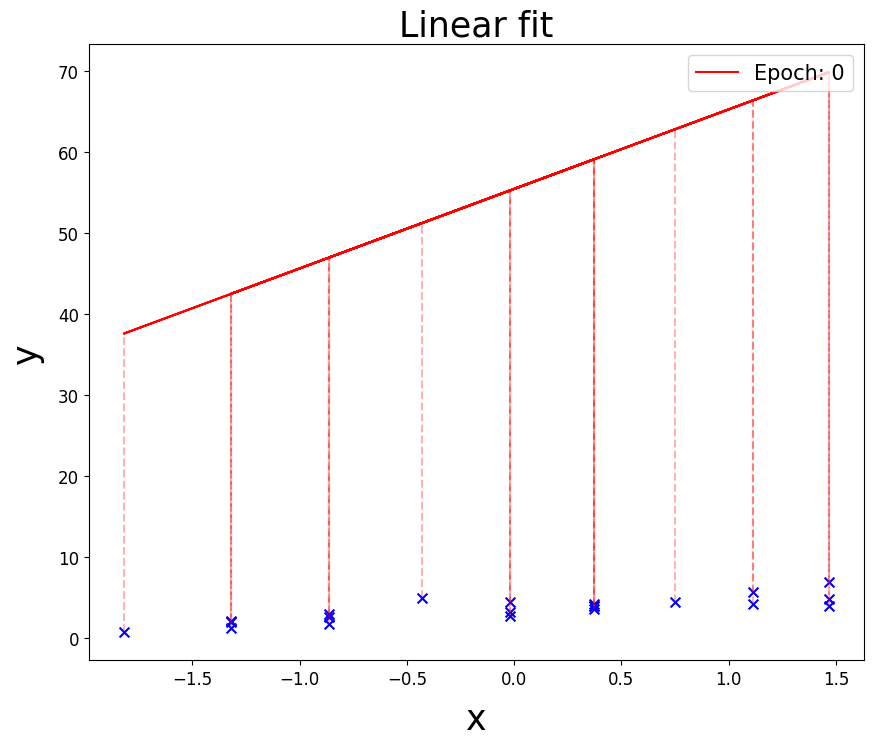

In [66]:



label_size = 12
fig, ax = plt.subplots(figsize=(10, 8))

def update(epoch):
    ax.clear()  # Clear the previous frame

    # Plot X_scale and y_pred for the current epoch
    ax.plot(X_scale, y_pred_list[epoch], color='red', label=f'Epoch: {epoch}')
    ax.vlines(X_scale, y_scale, ymax=y_pred_list[epoch], linestyle="dashed",
               color='r',alpha=0.3)
    ax.scatter(X_scale, y_scale, color='b', marker='x', s=50)


    ax.set_title("Linear fit", fontsize=25)
    ax.set_xlabel("x", fontsize=25, labelpad=10)
    ax.set_ylabel("y", fontsize=25, labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=label_size)
    ax.legend(loc='upper right', fontsize=15)

# Number of epochs
num_epochs = len(y_pred_list)

# Create the animation
animation = FuncAnimation(fig, update, frames=num_epochs, repeat=False)


animation_writer = 'pillow'
animation.save('linear_fit_animation.gif', writer=animation_writer, fps=60)


In [58]:
# cost_list[0:2]

In [59]:
# m_list

In [60]:
# b_list

In [61]:
# cost_list